# Amazon DATA_ANALYSE_PROJECT  
This dataset contains over 1,400+ ratings and comments for Amazon products, with all details compiled based on information listed on the official Amazon website.  
RunnianLU et YifanXiang  

Amazon Sales Dataset Columns Names：  
product_id - Product ID  
product_name - Name of the Product  
category - Category of the Product  
discounted_price - Discounted Price of the Product  
actual_price - Actual Price of the Product  
discount_percentage - Percentage of Discount for the Product  
rating - Rating of the Product  
rating_count - Number of people who voted for the Amazon rating  
about_product - Description about the Product  
user_id - ID of the user who wrote review for the Product  
user_name - Name of the user who wrote review for the Product  
review_id - ID of the user review  
review_title - Short review  
review_content - Long review  
img_link - Image Link of the Product  
product_link - Official Website Link of the Product  

# Data Organization and Cleaning Section__Runnian Lu

Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Reading data and examining the basic data structure
The purpose of previewing is to quickly scan data, identify potential issues or key areas of focus.

In [3]:
df = pd.read_csv("amazon.csv")
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

print(df.shape)
df.head()

The Number of Rows are 1465, and columns are 16.
(1465, 16)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

All columns are recognized as object type (i.e., strings).
However, columns like discounted_price, actual_price, discount_percentage, rating, and rating_count should actually be numeric types (float/int).
This indicates that before further analysis, these columns must first be converted from strings to numeric values.

In [5]:
# Check for missing values and count the number of “NaN (NaN)” values in each column.
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

There are a few missing values in the dataset, which we will read in detail and deal with later on in the notebook.

Data Exploration and Cleaning:

In [6]:
# Convert the original “string-type price / discount / rating” columns into true numerical (float) types to facilitate subsequent calculations, plotting, and clustering.

df['discounted_price'] = df['discounted_price'].str.replace("₹", '') # Remove currency symbols
df['discounted_price'] = df['discounted_price'].str.replace(",", '') # Remove the decimal separator
df['discounted_price'] = df['discounted_price'].astype('float64') # Convert to numeric type float64

df['actual_price'] = df['actual_price'].str.replace("₹", '')
df['actual_price'] = df['actual_price'].str.replace(",", '')
df['actual_price'] = df['actual_price'].astype('float64')

df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype('float64')
df['discount_percentage'] = df['discount_percentage'] / 100 # Remove the percent sign and convert to a decimal

# Check for any abnormal or non-numeric strings.
for col in ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print()




--- discounted_price ---
discounted_price
199.0     53
299.0     46
399.0     36
499.0     34
349.0     31
          ..
5865.0     1
85.0       1
2669.0     1
759.0      1
1110.0     1
Name: count, Length: 550, dtype: int64

--- actual_price ---
actual_price
999.0      120
499.0       71
1999.0      56
1499.0      37
399.0       34
          ... 
3290.0       1
1440.0       1
10995.0      1
4780.0       1
11495.0      1
Name: count, Length: 449, dtype: int64

--- discount_percentage ---
discount_percentage
0.50    56
0.60    56
0.00    49
0.80    37
0.55    36
        ..
0.07     2
0.02     2
0.89     1
0.94     1
0.09     1
Name: count, Length: 92, dtype: int64

--- rating ---
rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
3.0      3
4.8      3
5.0      3
2.8      2
3.2      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      

In [7]:
# Check the strange row in rating
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


Since we only see this single row of data, we choose to delete it directly (simple and with minimal impact).

In [8]:
# delete it
df = df[df['rating'] != '|']
df['rating'] = df['rating'].astype(float)

In [9]:
# Il y a une remarque qui dit que le nombre de notes a des virgules, donc il faut les enlever comme int.
# Changing 'rating_count' Column Data Type

df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   float64
 5   discount_percentage  1464 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non-null   object

Data Characteristics Overview
Quickly visualize key characteristics of a dataset, including numerical feature distribution, central tendency, dispersion, and range.

In [10]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1464.000000,1464.000000,1464.000000,1464.000000,1462.000000
mean,3126.011906,5447.002923,0.477131,4.096585,18307.376881
std,6946.625442,10878.270001,0.216274,0.291674,42766.096572
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,323.750000,800.000000,0.320000,4.000000,1191.500000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4303.750000,0.630000,4.300000,17342.250000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


This allows us to quickly grasp the overall distribution of the data
(Are there outliers? Extremely high prices? Low ratings?)

and determine if standardization is needed.
Clustering and PCA require data from different units to be comparable.
For example, prices are in the thousands while discounts range from 0 to 1—different orders of magnitude → Standardization is essential.  

Preliminary identification of anomalies or potential issues
For instance, the max value (₹139,900) is significantly higher than the average → May indicate an outlier product or premium category.  

Dealing with the missing values
We have identified two NaN values in the rating_count array. We will now proceed to address them.

In [11]:
df.isnull().sum()
# Find missing values percentage in the data
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False) 

rating_count           0.14
product_id             0.00
category               0.00
product_name           0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
rating                 0.00
about_product          0.00
user_id                0.00
user_name              0.00
review_id              0.00
review_title           0.00
review_content         0.00
img_link               0.00
product_link           0.00
dtype: float64

In [12]:
# Find total number of missing values
df.isnull().sum().sum()

np.int64(2)

## Missing Value Visualization Analysis (Missing Value Heatmap)

<Axes: >

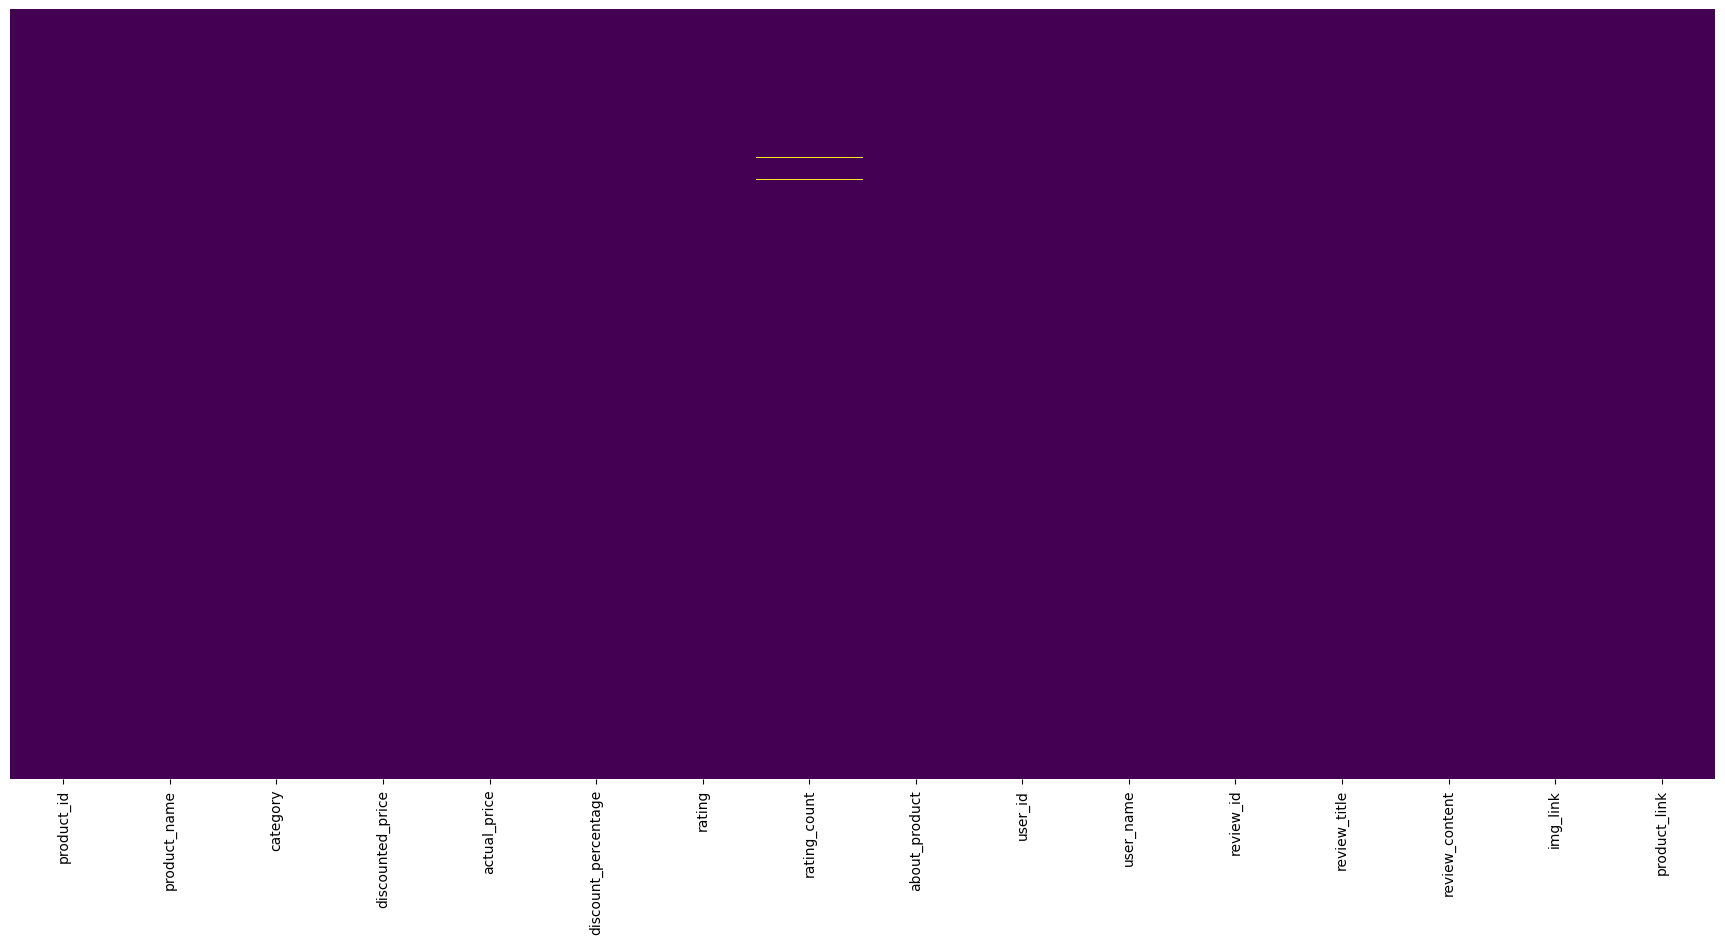

In [13]:
# Use a heatmap to display which columns and rows in the dataset contain NaN/missing values.
plt.figure(figsize=(22, 10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')


There are almost no missing values in the data, with only a few cells (such as the rating_count column) containing null values.
This result is identical to the previous df.isnull().sum() output (only 2 missing values).

In [14]:
# viewing the rows where there are null
df[df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


We chose to replace missing values with the median of this column.
Because the distribution of rating_count is highly skewed—some products have only a few reviews while others have hundreds of thousands—the mean is skewed upward by extreme outliers.
Therefore, the median better represents the typical number of reviews for a product.

In [15]:
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

In [16]:
# Verify again whether the repair was successful.
df.isnull().sum().sort_values(ascending=False)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Now that we have cleaned the missing values and outliers from the dataset, the data cleaning process is complete.
Next, we will proceed with the data visualization analysis.

# Data visualization analysis__Yifan Xiang

In this section, we aim to explore the cleaned Amazon product dataset through various visualizations.
By using descriptive charts and plots, we can better understand the overall distribution and relationships between key features such as product prices, discounts, ratings, and categories.
This exploratory analysis will help reveal potential trends, correlations, and insights that could guide further model-based analysis or business decisions.

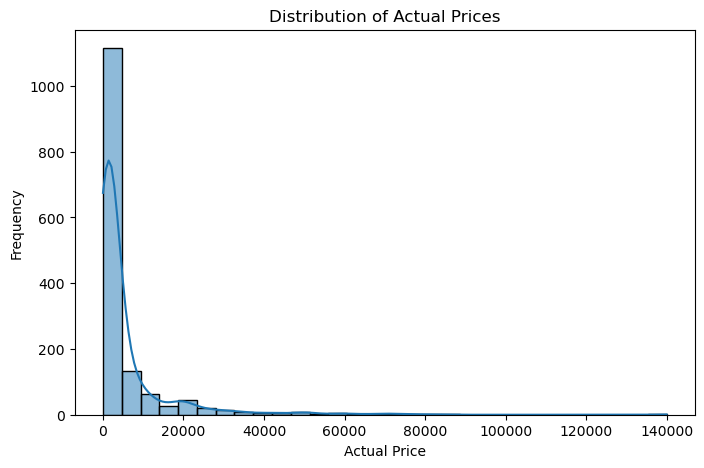

In [17]:
# Plot distribution of actual_price
plt.figure(figsize=(8,5))
sns.histplot(df['actual_price'], bins=30, kde=True)
plt.title("Distribution of Actual Prices")
plt.xlabel("Actual Price")
plt.ylabel("Frequency")
plt.show()

Price distribution typically skews toward the lower end, indicating that most products are concentrated in the mid-to-low price range.
The presence of long tails (extremely high-priced products) indicates that a small portion of premium products exist on the platform.

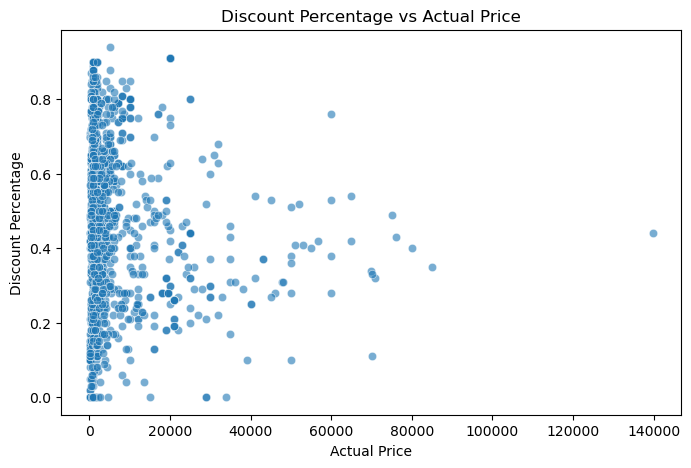

In [18]:
# Discount Rate vs. Actual Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='actual_price', y='discount_percentage', alpha=0.6)
plt.title("Discount Percentage vs Actual Price")
plt.xlabel("Actual Price")
plt.ylabel("Discount Percentage")
plt.show()

The scatter plot shows that most products are priced below 20,000, indicating a concentration in the low-to-mid price range.
The discount percentages are distributed quite randomly across different price levels, suggesting that discount rates are not directly related to the product price.
In other words, both low-priced and high-priced items can have significant discounts, but heavy discounts are more common among low-cost products.

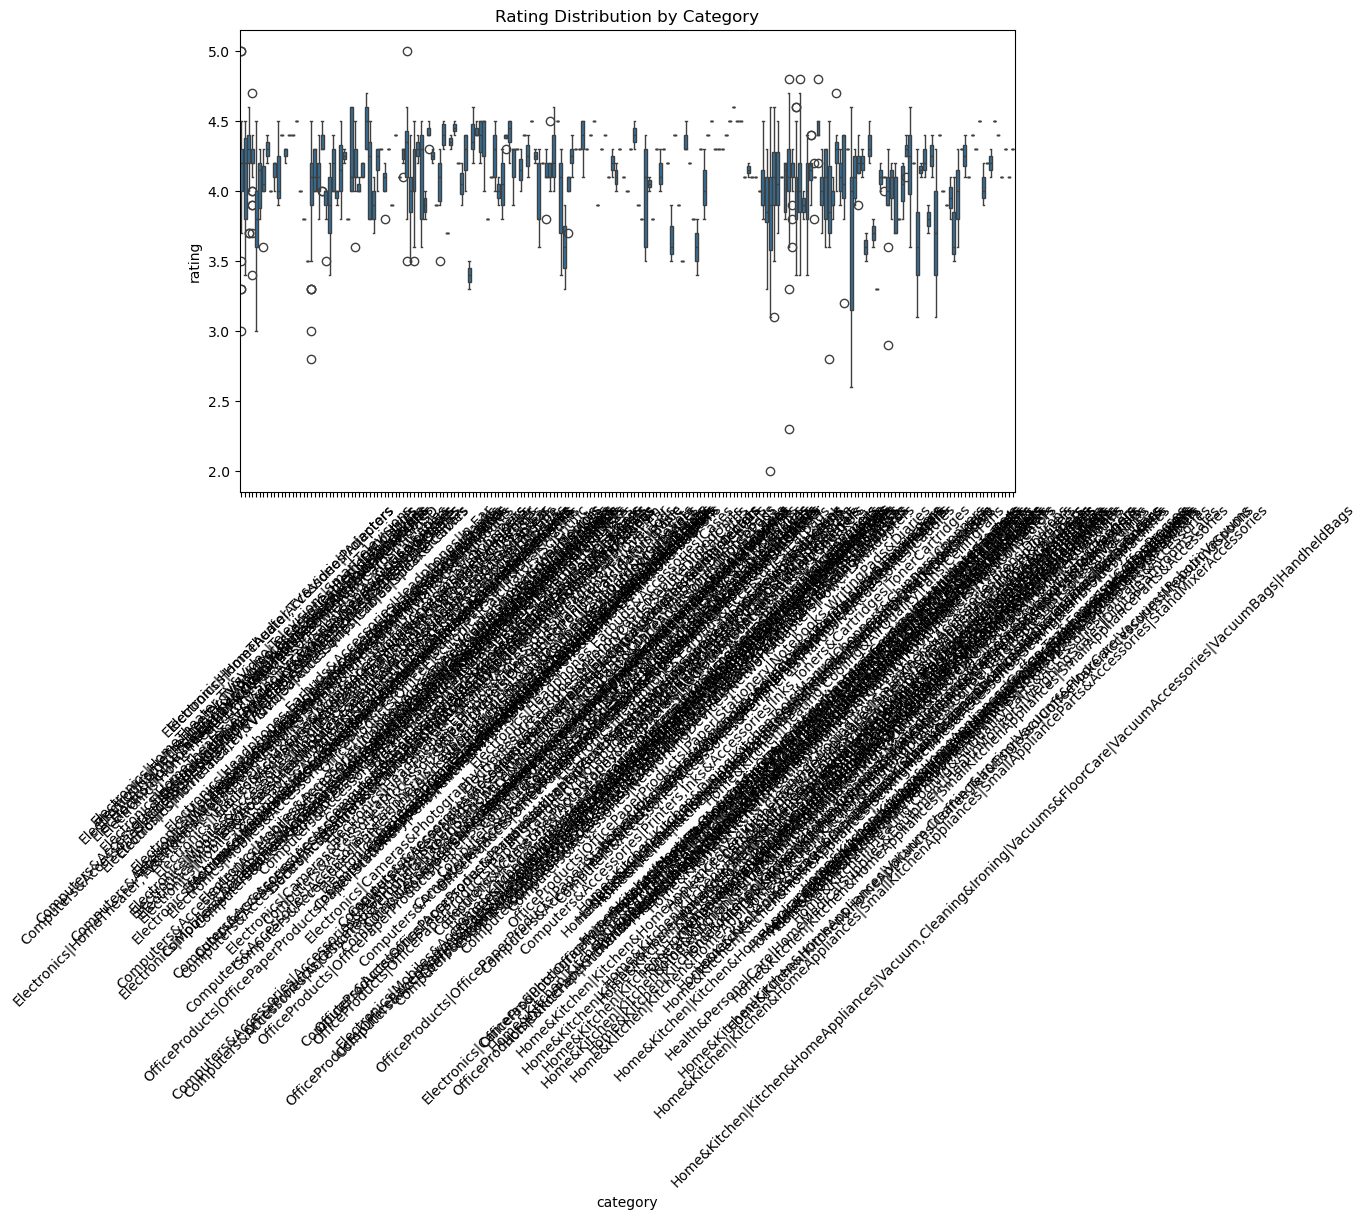

In [19]:
# Category Comparison (Performance Across Different Product Types)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='category', y='rating')
plt.xticks(rotation=45)
plt.title("Rating Distribution by Category")
plt.show()

In cases like this where there are many categories (the category column contains dozens or even hundreds of distinct values), displaying them horizontally in a boxplot can indeed become very cluttered and difficult to read. So we choose the bar chart to watch the average rating by category on top 15.

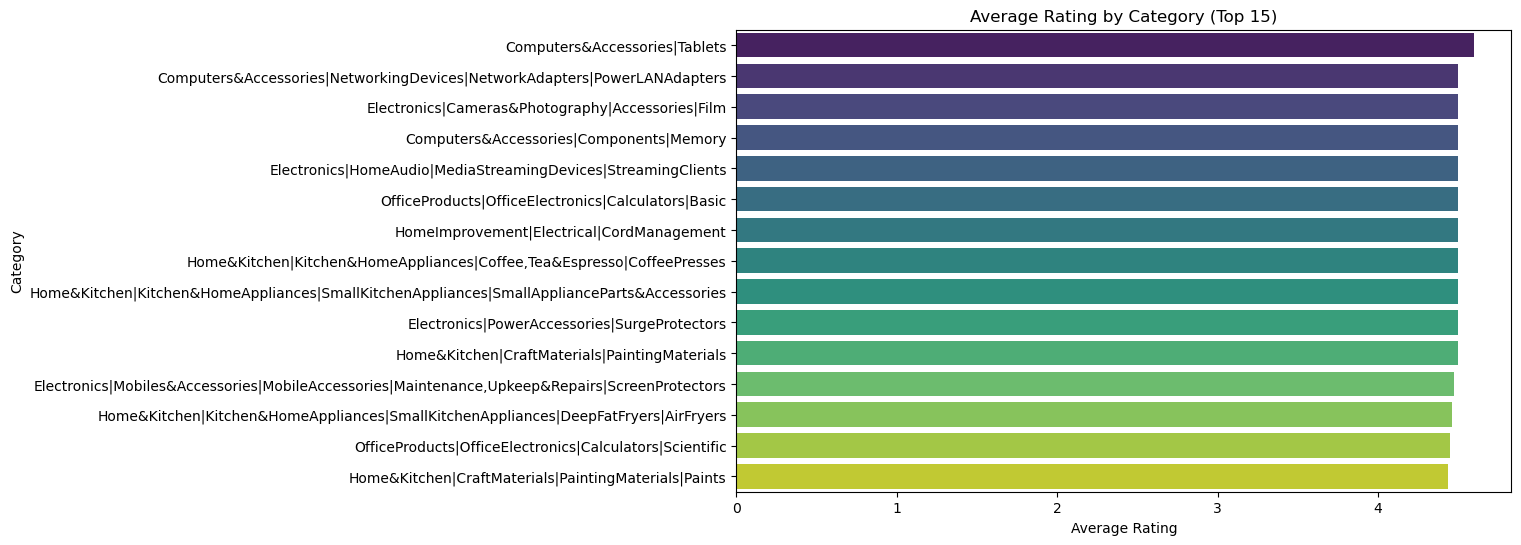

In [20]:
plt.figure(figsize=(10,6))
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_rating.values, y=avg_rating.index, hue=avg_rating.index,
            dodge=False, legend=False, palette='viridis')

plt.title("Average Rating by Category (Top 15)")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()

Users generally express satisfaction with electronic products (particularly tablets and networking devices), while traditional or more functional categories (such as office supplies and art materials) tend to receive more moderate ratings.

## Correlation Analysis / Heatmap Interpretation_Yifan

In this section, we explore the relationships between key numerical variables in the dataset using correlation analysis and heatmap visualization.
The correlation matrix helps identify how strongly different features are linearly related, such as between product prices, discounts, and customer ratings.
By visualizing these correlations, we can detect potential dependencies, redundancy among variables, or independent patterns that may influence customer satisfaction and product pricing strategies.

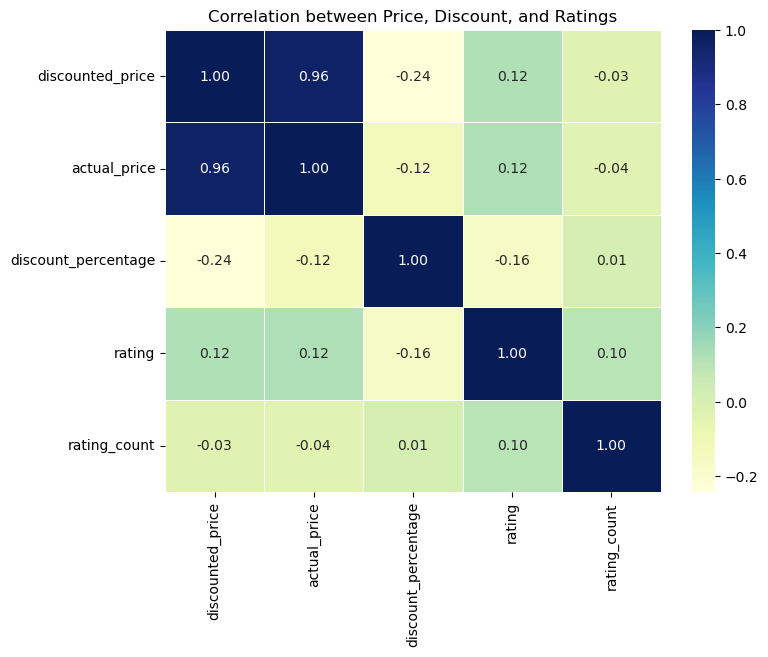

In [21]:
#Correlation between Price, Discount, and Ratings
cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
plt.figure(figsize=(8,6))
sns.heatmap(df[cols].corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Price, Discount, and Ratings")
plt.show()


We excluded columns (product_id, user_name, review_content, img_link, etc.) because they are non-numeric or non-unique fields lacking a calculable linear relationship. They are unsuitable for Pearson correlation calculations and should therefore not be included in the correlation analysis.

The retained five numeric variables represent the aspects most reflective of the business relationship.


We can see the price-related variables are strongly correlated with each other but show little to no correlation with rating variables, indicating that customer satisfaction is not driven by pricing factors.

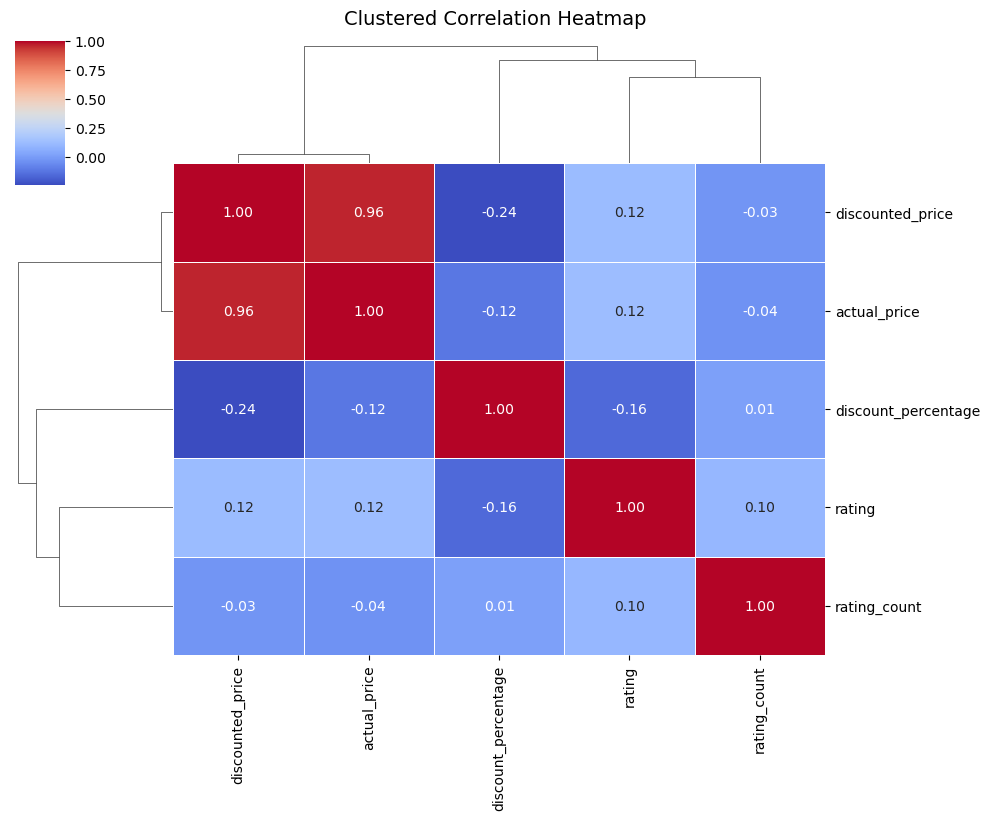

In [22]:
#Clustered Correlation Heatmap
sns.clustermap(
    df.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    figsize=(10,8),
    linewidths=0.4
)
plt.suptitle("Clustered Correlation Heatmap", y=1.02, fontsize=14)
plt.show()


This is the version with hierarchical clustering.
In addition to displaying correlations, it automatically groups highly correlated variables together and visualizes their similarity using a dendrogram.

The two branches in the upper left are very short → discounted_price and actual_price are extremely close (highly correlated).

discount_percentage forms its own branch → slightly distinct from price features.

rating and rating_count cluster into another branch → indicating they belong to the “user behavior” feature group.

For subsequent feature selection or dimensionality reduction (e.g., performing PCA or variable screening prior to model input)

After exploring the dataset visually, we now move forward to model-based analysis to uncover deeper relationships between the key variables.

# Perform automated grouping analysis of products using K-Means clustering and GMM (Gaussian Mixture Model)__Runnian LU

Data is sourced from Amazon products and includes fields such as price, discount, rating, and number of reviews.
These features reflect the “market positioning” of different products.
Through clustering, we can:
    -Identify groups of similar products (e.g., high-priced/high-rated vs. budget/promotional);
    -Assist merchants in product positioning or pricing strategy analysis;

In [23]:
features = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
X = df[features].copy()

DATA Standardization
Price values frequently reach tens of thousands, while ratings only range from 2 to 5;  
Features with different scales cause K-Means/GMM's “distance calculation” to heavily favor high-magnitude variables.  
For example:  
    -discounted_price ≈ 5000  
    -rating ≈ 4.0  
Without normalization, clustering will almost exclusively group based on “price,” ignoring ratings and discount information.  
With df.describe() above to show us more Infos.  

In [24]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Perform K-Means clustering analysis

1) Selecting the Appropriate Number of Clusters (k)  
Use the “Elbow Method” or “Silhouette Coefficient”:  

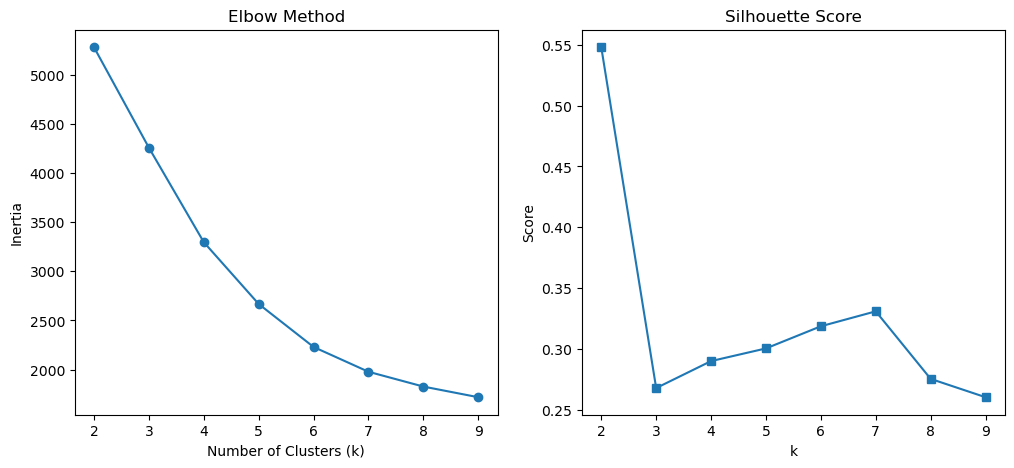

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(X_scaled, km.labels_))

# (Elbow Method)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, 'o-')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

# (Silhouette Method)
plt.subplot(1,2,2)
plt.plot(K_range, silhouette, 's-')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")
plt.show()

#### Cluster Number Selection Analysis

Using both the **Elbow Method** and the **Silhouette Score**, we can comprehensively determine the optimal number of clusters \( k \).


##### 1. Elbow Method

- **Observation:**  
  The Inertia (within-cluster sum of squared errors) decreases as \( k \) increases.  
  The curve starts to flatten around \( k = 6 \), forming a clear “elbow”.

- **Conclusion:**  
  👉 The optimal number of clusters is around **5 or 6**.  
  Increasing \( k \) further does not significantly improve clustering performance.


##### 2. Silhouette Score

- **Observation:**  
  The silhouette score reaches its highest value (≈ 0.55) when \( k = 2 \).  
  It slightly increases again around \( k = 5 , 6 \), but remains relatively low overall.

- **Conclusion:**  
  👉 The optimal number of clusters is **2**.  
  However, if finer-grained segmentation is desired, **5 or 6** can also be considered.


##### Overall

| Method | Recommended \( k \) | Reason |
|--------|----------------------|--------|
| Elbow Method | 5 or 6 | Curve starts to flatten — balance between model complexity and performance |
| Silhouette Score | 2 (secondary: 5 or 6) | Highest score — best cluster separation |

**Final:**  
> If we prioritize clearer separation between clusters → choose **k = 2**  
> If we prefer more detailed subgroup distinctions → choose **k = 5 or 6**  
> So, We aim to delve deeper into segment-specific characteristics (such as product, user, or behavioral categories), so we selected ****k=6.****  


In [26]:
# Train the final model with K = 6
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

In [27]:
# Analyze the mean values of each cluster's features (identify differences)
kmeans_summary = df.groupby('KMeans_Cluster')[features].mean().round(2)
print(kmeans_summary)

                discounted_price  actual_price  discount_percentage  rating  \
KMeans_Cluster                                                                
0                        1636.43       2274.27                 0.25    4.22   
1                       36181.21      56944.05                 0.35    4.27   
2                        1206.43       2624.44                 0.54    3.66   
3                        1443.20       2454.34                 0.48    4.16   
4                         907.59       2720.93                 0.64    4.19   
5                       14151.51      21561.84                 0.33    4.15   

                rating_count  
KMeans_Cluster                
0                   13069.88  
1                    8737.21  
2                    6109.82  
3                  224311.00  
4                   14328.04  
5                   15744.45  


#### Cluster Interpretation Summary

| Cluster | Type | Features & Meaning |
|----------|------|--------------------|
| **Cluster 0** |  Balanced Type | Mid-range price, small discount, average rating → mainstream consumer products |
| **Cluster 1** |  Premium Type | Extremely high price, few reviews, high rating → niche high-end products |
| **Cluster 2** |  Low-Quality Discount Type | High discount but low rating → possibly clearance or low-quality items |
| **Cluster 3** |  Trending Products | High rating, large sales volume → popular or viral products (e.g., Amazon bestsellers) |
| **Cluster 4** |  High Value-for-Money Type | High discount, reasonable price, good rating → cost-effective products |
| **Cluster 5** |  Mid-to-High-End Stable Type | Mid-to-high price, stable sales, high rating → reliable and quality-assured products |


#### PCA Cluster Visualization Interpretation

A 2D visualization plot, with different colors representing distinct product category clusters.  

##### What is PCA?

**PCA (Principal Component Analysis)** is a dimensionality reduction technique that transforms the original features (e.g., price, discount, rating, etc.) into new variables called **principal components**.

- **PC1 (Principal Component 1):** captures the direction of maximum variance in the data.  
- **PC2 (Principal Component 2):** captures the second-highest variance, orthogonal to PC1.

These components are **combinations of the original features**, allowing us to plot complex, high-dimensional data in 2D while retaining most of the structure and variation.  

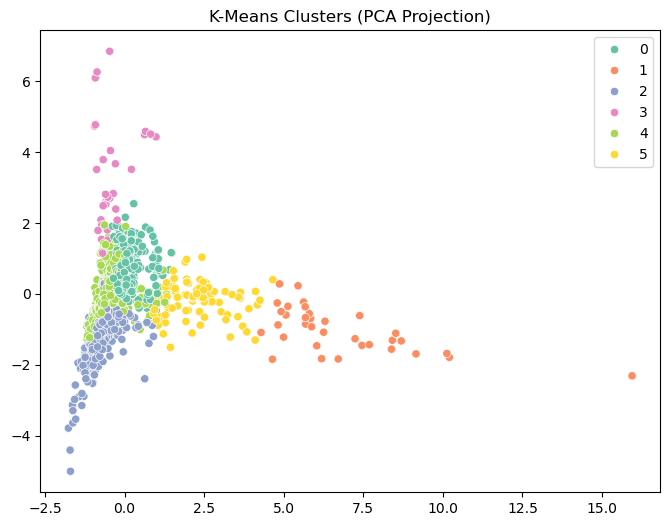

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='Set2')
plt.title("K-Means Clusters (PCA Projection)")
plt.show()


#### Summary Interpretation PCA

The PCA visualization reveals that:  
Each point → represents one product (after scaling)    
Each color → represents one cluster from K-Means  

- **Cluster 1** (orange) represents distinct high-end products separated from others.  
- **Clusters 0, 4, and 5** (center) represent mainstream or value-for-money items.  
- **Cluster 2** (bottom-left) groups discounted or low-price items.  
- **Cluster 3** (top) contains high-selling, popular products.

**In short:**  
> PCA helps visualize how clusters differ in overall structure.  
> High-end products stand apart, while most mainstream and promotional products cluster in the central region, reflecting real market segmentation.

### GMM analysis comparison
GMM is better at capturing “fuzzy boundaries” and “overlapping regions.”

#### Selecting the “Optimal GMM Model”
Perform exhaustive training and evaluation (using BIC, AIC, and Silhouette scores) on Gaussian Mixture Models (GMMs) with varying covariance types (covariance_type) and numbers of clusters (k), ultimately automatically selecting the “optimal model.

In [29]:
# Lib GMM:
from sklearn.mixture import GaussianMixture

# Ensure that there is reduced-dimensional data
try:
    X_pca
except NameError:
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

# Set model testing parameters
"""
cov_types: Four distinct covariance matrix structures.
'full': Each Gaussian component has a full covariance matrix (most flexible)
‘tied’: All components share the same covariance matrix
‘diag’: Each component's covariance matrix is diagonal (independent across dimensions)
‘spherical’: Each component is spherical (equal variance in all directions)
"""
k_range = range(2, 11)
cov_types = ['full', 'tied', 'diag', 'spherical']

Below are the combinations of the four cov_type × k values:
Create the GMM model:
Train using the standardized data X_scaled;
Predict the category each sample belongs to;
Calculate the clustering quality metrics:
- BIC (Bayesian Information Criterion, lower values are better)
- AIC (Akaike Information Criterion, lower values are better)
- Silhouette score (higher values are better)  

Finally, store each set of results in the results list.


In [30]:
# Trained and evaluated the model iteratively.
# Combine each of the four cov_type values with each k value in all possible permutations.
results = []
for cov in cov_types:
    for k in k_range:
        gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=42)
        gmm.fit(X_scaled)
        labels = gmm.predict(X_scaled)
        sil = silhouette_score(X_scaled, labels)
        results.append({
            'covariance_type': cov,
            'k': k,
            'bic': gmm.bic(X_scaled),
            'aic': gmm.aic(X_scaled),
            'silhouette': sil
        })

res_df = pd.DataFrame(results)

Result Visualization BIC / AIC and Silhouette 

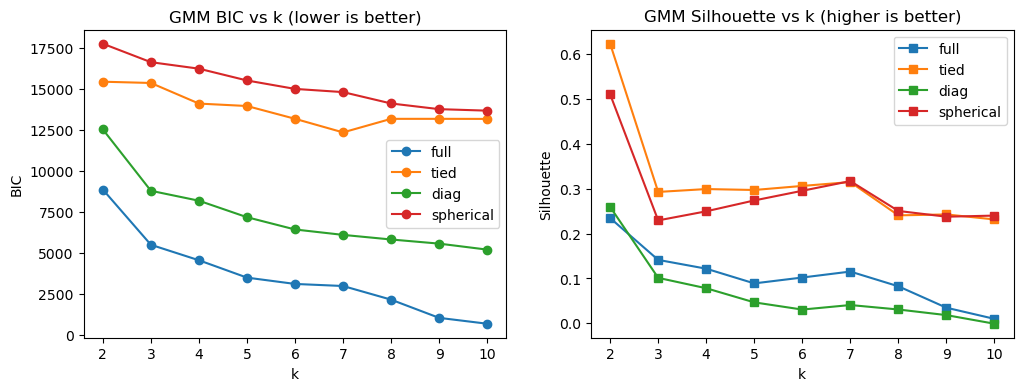

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
for cov in cov_types:
    sub = res_df[res_df['covariance_type'] == cov]
    axes[0].plot(sub['k'], sub['bic'], marker='o', label=cov)
    axes[1].plot(sub['k'], sub['silhouette'], marker='s', label=cov)

axes[0].set_title('GMM BIC vs k (lower is better)')
axes[0].set_xlabel('k')
axes[0].set_ylabel('BIC')
axes[0].legend()

axes[1].set_title('GMM Silhouette vs k (higher is better)')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Silhouette')
axes[1].legend()
plt.show()

Selection Strategy: Prioritize the smallest BIC; in case of ties, break them using the largest Silhouette coefficient.  

Covariance Type Comparison:
Among all covariance structures, the full type achieves the lowest BIC, indicating the best fit to the data distribution. Models with spherical or diag covariance perform worse.

Number of Clusters (k):
As k increases, BIC continuously decreases while Silhouette drops toward 0, suggesting overfitting and overlapping clusters.

Final Model:
The optimal model I selected is ***full, k=3*** (with a higher Silhouette coefficient), which provides the best fit in a statistically significant manner and exhibits a clearer clustering structure.  

#### Train the final GMM and output soft clustering probabilities

In [32]:
# best_k = 3 with FULL

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

# The probability that each sample belongs to each cluster
proba = gmm.predict_proba(X_scaled)
# Take the cluster with the highest probability in each row as the sample's category label.
gmm_labels = proba.argmax(axis=1)

df['GMM_Cluster'] = gmm_labels

# Silhouette Score range: [-1, 1], where a higher value indicates better separation between clusters.
gmm_sil = silhouette_score(X_scaled, gmm_labels)
print("GMM silhouette:", round(gmm_sil, 3))

# The model's confidence in clustering this sample (the closer to 1, the more certain the model is that this sample belongs to a particular cluster)
df['GMM_max_prob'] = proba.max(axis=1).round(3)


GMM silhouette: 0.141


In [33]:
# Silhouette
km_sil = silhouette_score(X_scaled, kmeans_labels)
print(f"[Silhouette] KMeans={km_sil:.3f}   GMM={gmm_sil:.3f}")

# Clustered Picture (Mean Table)
kmeans_summary = df.groupby('KMeans_Cluster')[features].mean().round(2)
gmm_summary    = df.groupby('GMM_Cluster')[features].mean().round(2)

print("\nKMeans cluster summary:\n", kmeans_summary)
print("\nGMM cluster summary:\n", gmm_summary)


[Silhouette] KMeans=0.319   GMM=0.141

KMeans cluster summary:
                 discounted_price  actual_price  discount_percentage  rating  \
KMeans_Cluster                                                                
0                        1636.43       2274.27                 0.25    4.22   
1                       36181.21      56944.05                 0.35    4.27   
2                        1206.43       2624.44                 0.54    3.66   
3                        1443.20       2454.34                 0.48    4.16   
4                         907.59       2720.93                 0.64    4.19   
5                       14151.51      21561.84                 0.33    4.15   

                rating_count  
KMeans_Cluster                
0                   13069.88  
1                    8737.21  
2                    6109.82  
3                  224311.00  
4                   14328.04  
5                   15744.45  

GMM cluster summary:
              discounted_price  a

#### PCA Visual Comparison (K-Means vs GMM)  

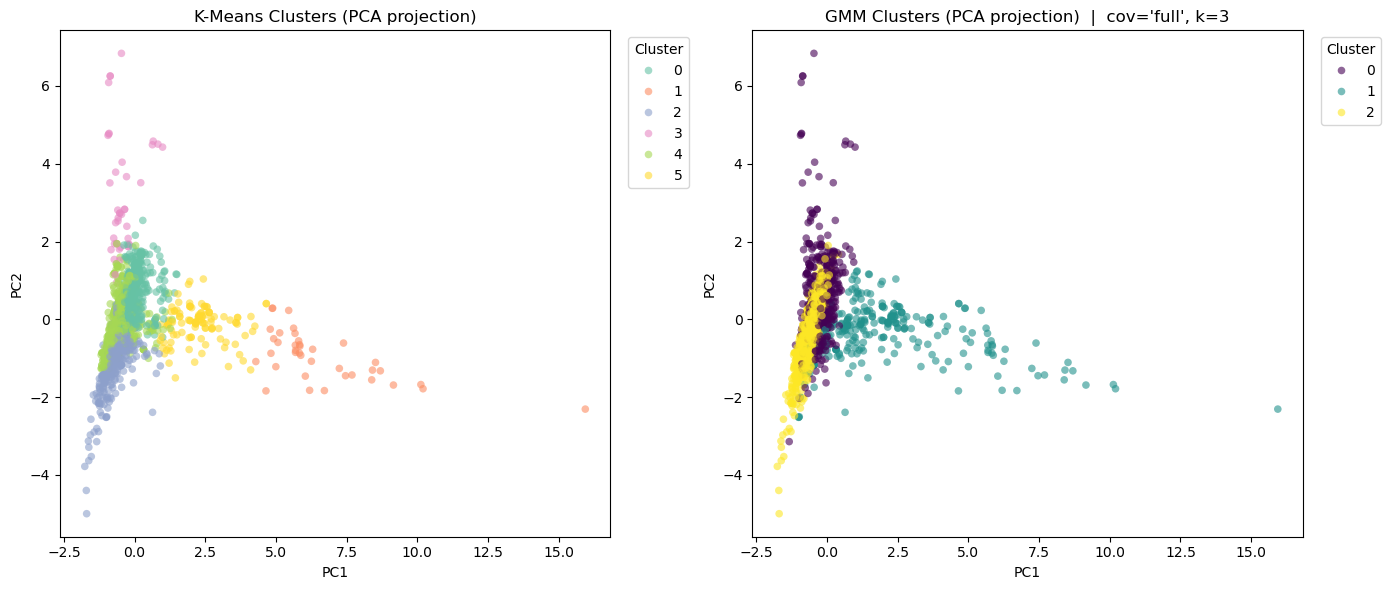

In [34]:
plt.figure(figsize=(14,6))

# Left：KMeans
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, s=30, palette='Set2', linewidth=0, alpha=0.6)
plt.title("K-Means Clusters (PCA projection)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')

# Right：GMM
plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=gmm_labels, s=30, palette='viridis', linewidth=0, alpha=0.6)
plt.title(f"GMM Clusters (PCA projection)  |  cov='full', k=3")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout(); plt.show()


In [35]:
df.groupby('GMM_Cluster')[['actual_price','discounted_price','rating','rating_count']].mean().round(2)

,actual_price,discounted_price,rating,rating_count
GMM_Cluster,,,,
0,2459.43,1444.95,4.14,41949.47
1,20660.40,12194.40,4.15,13262.51
2,1245.36,560.68,4.05,5856.66


After applying both K-Means and Gaussian Mixture Model (GMM) clustering on the standardized product dataset, we observed that K-Means achieved a higher silhouette score (0.319 vs 0.141), indicating clearer and more compact clusters.

The K-Means segmentation reveals six distinct product categories — high-end, promotional, bestseller, and cost-effective products — each with meaningful commercial implications.

In contrast, GMM formed only three broad clusters, merging several K-Means groups into fewer, less interpretable categories:  
  **Cluster 0 (Mid-range Bestsellers):**  
Moderately priced products with large sales volumes and stable ratings (~4.1).  
→ Represent mainstream market products that drive platform traffic and revenue.
  
  **Cluster 1 (Premium Segment):**  
High-priced products with excellent ratings (~4.45) and moderate review counts.  
→ Reflects the luxury or flagship line; marketing should focus on brand value and exclusivity.
  
  **Cluster 2 (Budget/Promotional Segment):**  
Low-priced, heavily discounted items with fewer reviews (~4.0).  
→ Suitable for promotions, price-sensitive customers, and clearance campaigns.

  *Overall*, the GMM model effectively identifies **three distinct market segments** —  premium, mainstream, and budget — enabling targeted pricing and marketing strategies.


-K-Means: Each point can only be assigned to one category (hard classification)  
-GMM: Provides the probability of each point belonging to multiple categories (soft classification)

Therefore, GMM is particularly suitable for scenarios such as product classification, customer segmentation, market segmentation, anomaly detection, and probabilistic analysis.

# Overall Business Analysis & Strategic Recommendations Part 1__Runnian Lu

### Summary of Findings

Through standardized preprocessing, PCA, and dual clustering (K-Means & GMM), I derived complementary segmentation insights:

1. **K-Means** identified **six well-separated product clusters**, representing clear categories such as premium, promotional, bestseller, and cost-effective products.  
   - Its higher silhouette score (0.319) indicates more compact, interpretable groups.  
2. **GMM** grouped the dataset into **three broader market tiers** — premium, mainstream, and budget —  
   revealing smoother probabilistic transitions and overlapping boundaries.

---

### Market Segments & Insights

| Segment | Key Traits | Customer Profile | Strategy |
|----------|-------------|------------------|-----------|
| Premium Segment | High-priced (20k+), low discounts, top ratings (4.4) | Brand- and quality-focused consumers | Strengthen brand image, offer VIP benefits, maintain pricing stability |
| Mid-range Bestsellers | Moderate price (2–3k), large review count, stable ratings (4.1) | Mass-market consumers | Optimize stock and delivery, promote reviews, maintain small discounts |
| Budget/Promotional Segment | Low price (1k), heavy discounts, fewer ratings (4.0) | Price-sensitive or new customers | Ideal for promotions, clearance, and acquisition campaigns |

---

### Strategic Implications

- **K-Means** → best for clear, actionable product segmentation.  
- **GMM** → best for understanding product overlap and uncertainty.  
- **Combined approach** = interpretable structure + realistic probabilistic insights.  

---

✨ *In conclusion*, the integration of **K-Means** and **GMM** provides both **clear segmentation** and **probabilistic depth**, supporting data-driven pricing, marketing, and recommendation strategies for Amazon’s product ecosystem.

---

# Hierarchical / Agglomerative Clustering_Yifan Xiang

After exploring partition-based clustering methods such as K-Means and Gaussian Mixture Models, which provide clear and well-defined product segmentations,
we now turn to Hierarchical (Agglomerative) Clustering — a complementary approach that focuses on uncovering the nested structure and similarity hierarchy among products.

Unlike K-Means, which directly assigns each data point to one of K clusters, hierarchical clustering builds a tree-like structure (dendrogram) that reveals how products gradually merge based on their feature similarity.
This allows us to visualize relationships across different levels of granularity — from individual items to broader product categories — offering deeper insight into the structure of the marketplace.

In [37]:
# Step 1: Import libraries and select features

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# Select numeric features for clustering
features = ['actual_price', 'discount_percentage', 'rating', 'rating_count']

X = df[features].copy()

# Log-transform rating_count to reduce skewness
X['rating_count'] = np.log1p(X['rating_count'])

X.head()


,actual_price,discount_percentage,rating,rating_count
0,1099.0,0.64,4.2,10.096996
1,349.0,0.43,4.0,10.691831
2,1899.0,0.90,3.9,8.978282
3,699.0,0.53,4.2,11.454915
4,399.0,0.61,4.2,9.735424


We select four key numerical variables representing product price, discount strategy, customer satisfaction, and popularity.
Log transformation is applied to rating_count to reduce skewness and improve cluster stability.

Standardization ensures that all features contribute equally to distance calculations.
Without scaling, price would dominate clustering due to its large magnitude.

In [45]:
# Step: Log transform
df['rating_count_log'] = np.log1p(df['rating_count'])

# Step: Select final features
features = ['actual_price', 'discount_percentage', 'rating', 'rating_count_log']
X = df[features].copy()

# Step: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preview
pd.concat([X.head(), pd.Series(X_scaled[:5].tolist(), name="scaled_features")], axis=1)


,actual_price,discount_percentage,rating,rating_count_log,scaled_features
0,1099.0,0.64,4.2,10.096996,"[-0.39983275447872857, 0.7533237384341512, 0.3..."
1,349.0,0.43,4.0,10.691831,"[-0.46880109951789095, -0.217997558932882, -0...."
2,1899.0,0.90,3.9,8.978282,"[-0.3262665197702887, 1.9559120113647637, -0.6..."
3,699.0,0.53,4.2,11.454915,"[-0.43661587183294853, 0.24453639219427678, 0...."
4,399.0,0.61,4.2,9.735424,"[-0.46420320984861346, 0.6145635530960035, 0.3..."


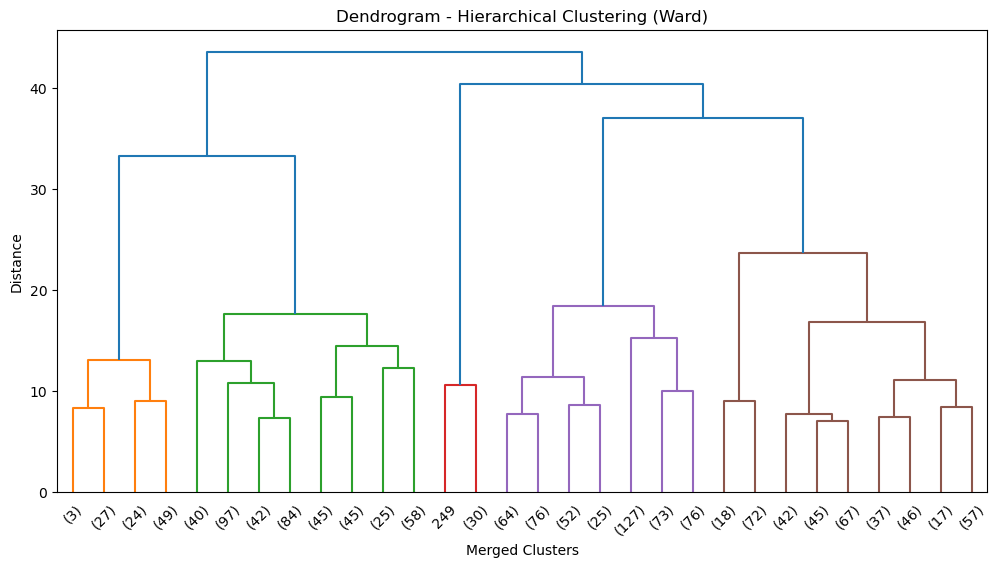

In [46]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, show_leaf_counts=True)
plt.title("Dendrogram - Hierarchical Clustering (Ward)")
plt.xlabel("Merged Clusters")
plt.ylabel("Distance")
plt.show()


The dendrogram reveals the hierarchical structure of product similarity based on price, discount percentage, rating, and review volume (log-scaled). A clear large vertical separation appears around distance ~35–40, indicating that the data naturally form three main clusters. This suggests that cutting the tree at this level results in well-defined and meaningful product groups.

At lower levels of the tree, several smaller sub-clusters merge gradually, showing smooth similarity transitions within each main cluster. This reinforces the idea that products within each segment share consistent pricing and rating patterns, while differences across the three main branches reflect broader market tiers.

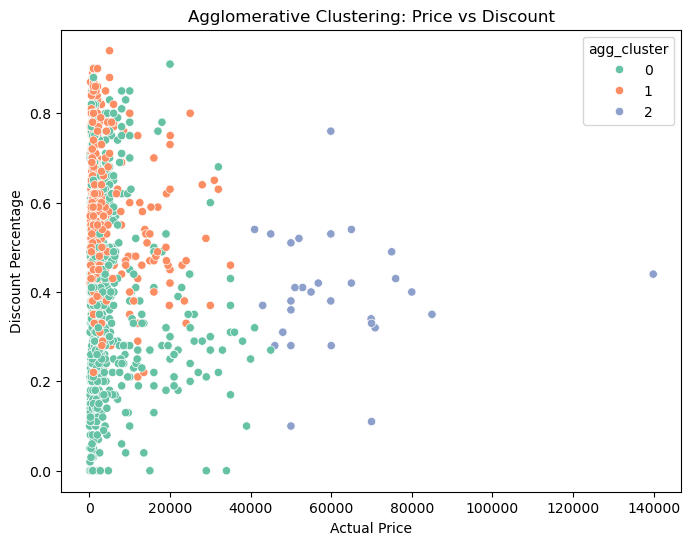

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['actual_price'], 
    y=df['discount_percentage'], 
    hue=df['agg_cluster'], 
    palette='Set2'
)
plt.title("Agglomerative Clustering: Price vs Discount")
plt.xlabel("Actual Price")
plt.ylabel("Discount Percentage")
plt.show()


We begin by visualizing price vs. discount because these two variables most directly reflect a product’s market position and promotional strategy. This scatter plot provides an intuitive initial validation of clustering patterns before examining rating and popularity dimensions.

The scatter plot visualizes product clusters based on price and discount percentage. A clear segmentation pattern emerges:

-Cluster 2 (blue) consists of high-priced products with moderate discounts, reflecting premium or high-end items where brand value or product quality allows limited price reduction.

-Cluster 1 (orange) represents mid-priced products with relatively higher discounts. This group likely corresponds to mass-market items competing through promotional activity.

-Cluster 0 (green) includes low to mid-priced products with varied but generally lower discount rates, indicating cost-effective or budget-focused products with stable pricing strategies.

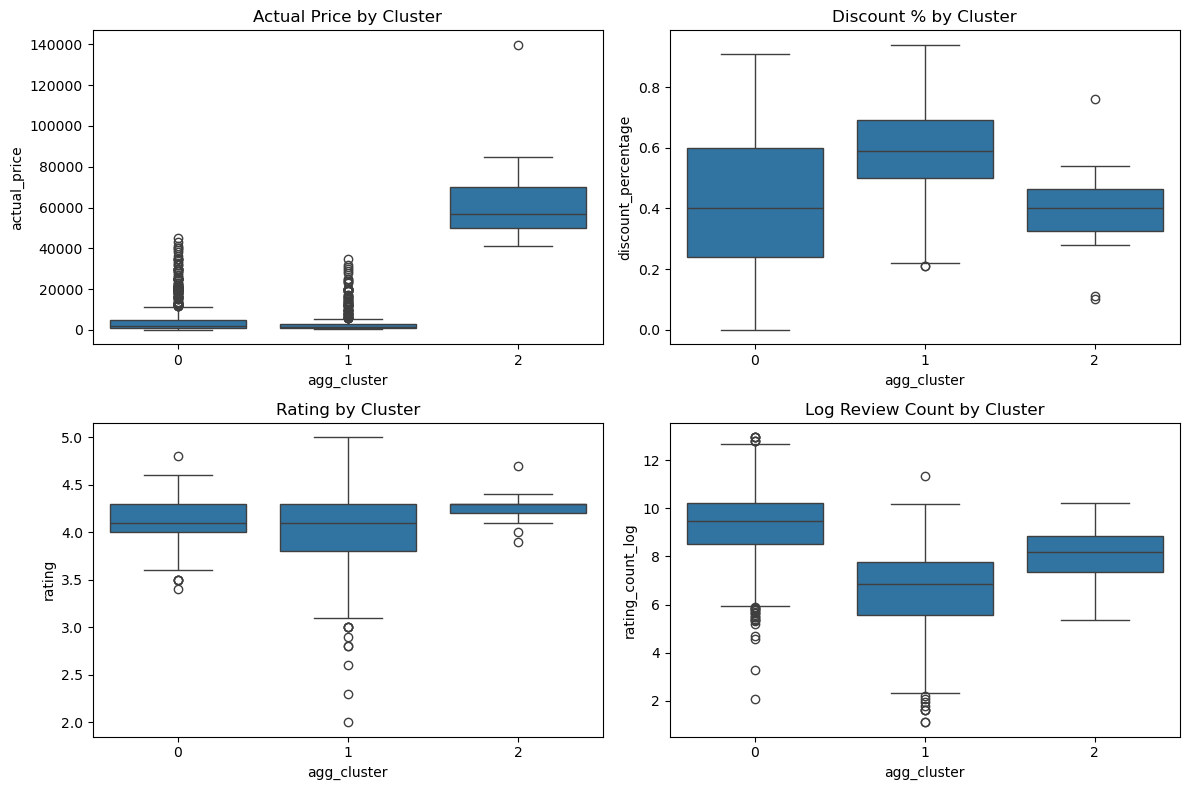

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.boxplot(x=df['agg_cluster'], y=df['actual_price'], ax=axes[0,0])
axes[0,0].set_title("Actual Price by Cluster")

sns.boxplot(x=df['agg_cluster'], y=df['discount_percentage'], ax=axes[0,1])
axes[0,1].set_title("Discount % by Cluster")

sns.boxplot(x=df['agg_cluster'], y=df['rating'], ax=axes[1,0])
axes[1,0].set_title("Rating by Cluster")

sns.boxplot(x=df['agg_cluster'], y=df['rating_count_log'], ax=axes[1,1])
axes[1,1].set_title("Log Review Count by Cluster")

plt.tight_layout()
plt.show()



This boxplot visualization highlights clear behavioral differences across the three clusters based on price, discount strategy, rating, and popularity (log review count).

Cluster 2 — Premium Segment

Characteristics：
-Highest price range by a large margin
-Moderate discounting
-Consistent high ratings
-Moderate review volume

Interpretation
Products positioned as premium or flagship items. Pricing power is strong, limited reliance on heavy promotions, consistent customer satisfaction signals.

Cluster 1 — Mid-range Promotional Segment

Characteristics：
-Mid-level prices
-Highest discounts across clusters
-Widest spread in ratings (some low-rating items)
-Highest review counts (popular, widely purchased)

Interpretation
Represents mainstream, volume-driven products that rely on promotions to compete. High engagement but also higher variability in perceived quality.

Cluster 0 — Budget / Value Segment

Characteristics：
-Lowest price range
-Lower discounts compared to Cluster 1
-Stable ratings (close to platform average)
-Moderately high review counts

Interpretation
Value-oriented, cost-efficient products. Customers buy not because of heavy promotion but affordability. Ratings stable — value for money segment.

Conclusion：
Agglomerative clustering successfully uncovers three distinct pricing and promotion strategies in the marketplace: premium quality-driven products, promotional mainstream products, and everyday value products.

# DBSCAN_Yifan Xiang

After applying hierarchical (Agglomerative) clustering methods, we now explore DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to identify natural product clusters without pre-defining the number of groups.

Unlike previous methods, DBSCAN groups points based on local density and is capable of:discovering arbitrarily-shaped clusters,identifying outliers / niche products,handling noise and extreme pricing strategies more effectively

This makes DBSCAN particularly valuable in e-commerce scenarios where product distributions are often uneven, long-tailed, and influenced by irregular promotional behavior.
In this section, we will use DBSCAN to detect dense product segments and highlight anomalous items that may represent luxury products, extreme discounts, or data anomalies.

In [51]:
# Step 1: Select numeric features for DBSCAN
features = ['actual_price', 'discount_percentage', 'rating', 'rating_count']
X = df[features].copy()

# Log transform rating_count to reduce skewness (long-tail distribution)
X['rating_count_log'] = np.log1p(X['rating_count'])

# Drop raw rating_count, keep log version
X = X.drop(columns='rating_count')

# Preview first rows
X.head()


,actual_price,discount_percentage,rating,rating_count_log
0,1099.0,0.64,4.2,10.096996
1,349.0,0.43,4.0,10.691831
2,1899.0,0.90,3.9,8.978282
3,699.0,0.53,4.2,11.454915
4,399.0,0.61,4.2,9.735424


We select four main numerical features representing pricing, discount intensity, product quality, and popularity.

In [52]:
from sklearn.preprocessing import StandardScaler

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preview
X_scaled[:5]


array([[-0.39983275,  0.75332374,  0.35467889,  0.88504011],
       [-0.4688011 , -0.21799756, -0.33125228,  1.17867929],
       [-0.32626652,  1.95591201, -0.67421786,  0.33278898],
       [-0.43661587,  0.24453639,  0.35467889,  1.55537412],
       [-0.46420321,  0.61456355,  0.35467889,  0.70655056]])

DBSCAN is distance-based, so all features must be scaled to the same range to avoid domination by large-scale variables (e.g., price).

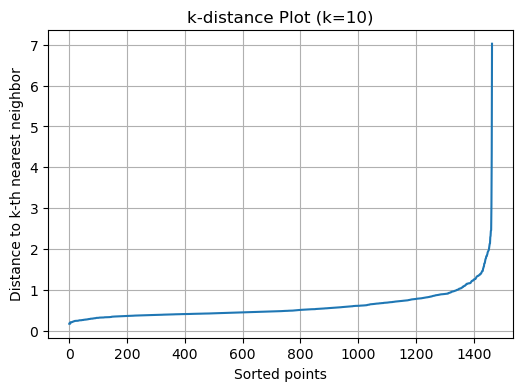

In [53]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

min_samples = 10  # can tune later
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Take the distance to the k-th nearest neighbor for each point
k_distances = np.sort(distances[:, -1])

plt.figure(figsize=(6,4))
plt.plot(k_distances)
plt.title(f'k-distance Plot (k={min_samples})')
plt.xlabel("Sorted points")
plt.ylabel("Distance to k-th nearest neighbor")
plt.grid(True)
plt.show()


In DBSCAN, the eps parameter defines the neighborhood radius for clustering. A suitable eps value is crucial:

Too small → many points become noise

Too large → clusters merge into one group

To estimate eps, we use the k-distance plot, which computes each point’s distance to its k-th nearest neighbor (here k = min_samples = 10) and sorts the values.
The optimal eps is located at the “elbow point”, where the curve transitions from a slow increase to a steep rise — indicating the boundary between dense clusters and sparse noise points.

From our k-distance plot, the elbow occurs around 1.2 which we choose it for eps，this ensures DBSCAN captures meaningful product clusters while correctly flagging outliers.

This data-driven tuning process ensures that DBSCAN forms meaningful product clusters without over-merging categories or excessively labeling products as noise.

In [54]:
from sklearn.cluster import DBSCAN

eps_value = 1.2
min_samples_value = 10

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
db_labels = dbscan.fit_predict(X_scaled)

df['dbscan_cluster'] = db_labels
df['dbscan_cluster'].value_counts()


dbscan_cluster
 0    1436
-1      28
Name: count, dtype: int64

One dominant dense cluster (most products share similar statistical behavior)

28 outliers that significantly deviate from the majority

In [55]:
df.groupby('dbscan_cluster')[['actual_price','discount_percentage','rating','rating_count_log']].mean()


,actual_price,discount_percentage,rating,rating_count_log
dbscan_cluster,,,,
-1,38834.214286,0.542143,3.989286,5.902977
0,4795.998802,0.475864,4.098677,8.350959


The main cluster represents the vast majority of Amazon products, showing consistent price, rating, and engagement patterns. In contrast, outliers are characterized by significantly higher prices, fewer reviews, slightly lower ratings, and slightly higher discount levels, suggesting that they are likely premium or niche products with limited demand or seasonal markdowns. This indicates that while the Amazon marketplace is largely homogeneous in terms of pricing and popularity trends, there exists a small group of extreme-value items that stand out due to their luxury positioning or unique promotional strategy.

Since price–discount clustering was already visualized, the following scatter plots explore additional behavioral dimensions (rating and review activity) to understand whether DBSCAN outliers also differ in customer perception and engagement.

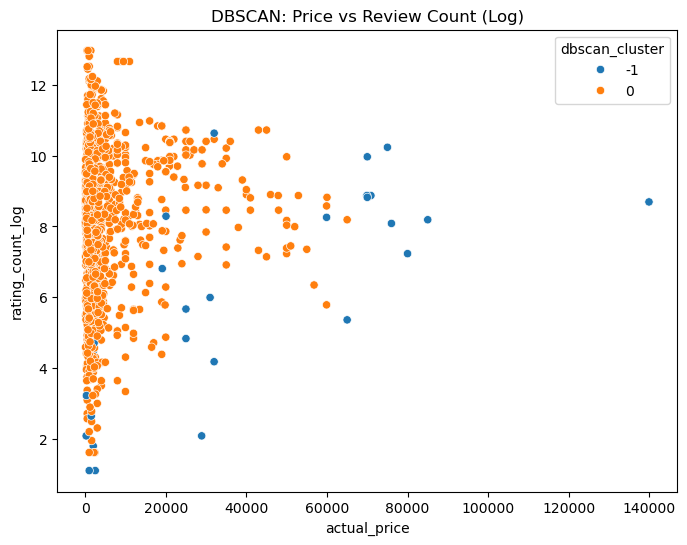

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='actual_price', 
    y='rating_count_log', 
    hue='dbscan_cluster',
    palette='tab10'
)
plt.title("DBSCAN: Price vs Review Count (Log)")
plt.show()


DBSCAN successfully isolated high-price niche products as outliers

These products tend to:

-cost significantly more

-receive fewer reviews

-Likely premium, niche or luxury products with limited audience

Business meaning：
-Outliers = special attention items

-may need targeted marketing

-could be luxury category needing different pricing strategy

-some might be suspicious / wrongly priced listings

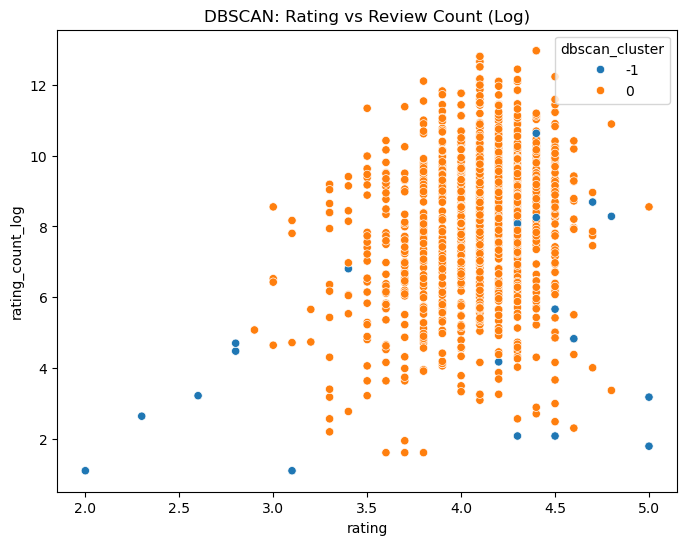

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='rating', 
    y='rating_count_log', 
    hue='dbscan_cluster',
    palette='tab10'
)
plt.title("DBSCAN: Rating vs Review Count (Log)")
plt.show()


Outliers here represent risky or niche listings, possibly:

-overpriced products consumers avoid

-new products lacking traction

-premium items with limited audience

-potential low-quality listings

Outliers show extreme rating & review behavior — either new & niche, or unpopular & overpriced products.

In [59]:
df[df['dbscan_cluster'] == -1][[
    'product_name',
    'actual_price',
    'discount_percentage',
    'rating',
    'rating_count'
]].head(15)


,product_name,actual_price,discount_percentage,rating,rating_count
77,TCL 80 cm (32 inches) HD Ready Certified Andro...,30990.0,0.65,4.1,398.0
82,SKYWALL 81.28 cm (32 inches) HD Ready Smart LE...,19125.0,0.62,3.4,902.0
150,VU 138 cm (55 inches) Premium Series 4K Ultra ...,65000.0,0.54,4.1,211.0
174,Syncwire LTG to USB Cable for Fast Charging Co...,1999.0,0.80,5.0,5.0
192,Samsung 138 cm (55 inches) Crystal 4K Neo Seri...,70900.0,0.32,4.3,7109.0
206,TCL 80 cm (32 inches) HD Ready Certified Andro...,31990.0,0.63,4.2,64.0
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,139900.0,0.44,4.7,5935.0
255,VU 164 cm (65 inches) The GloLED Series 4K Sma...,85000.0,0.35,4.3,3587.0
276,Samsung 138 cm (55 inches) Crystal 4K Series U...,69900.0,0.34,4.3,7109.0
283,LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...,79990.0,0.40,4.3,1376.0


DBSCAN successfully separated a dense mainstream consumer electronics market from a set of premium-priced niche products and newly-listed low-interaction items, highlighting a distinct luxury segment and potential data anomalies.

In [60]:
for eps in [1.0, 1.2, 1.5]:
    labels = DBSCAN(eps=eps, min_samples=10).fit_predict(X_scaled)
    print(f"eps={eps}", pd.Series(labels).value_counts())


eps=1.0  0    1412
-1      52
Name: count, dtype: int64
eps=1.2  0    1436
-1      28
Name: count, dtype: int64
eps=1.5  0    1457
-1       7
Name: count, dtype: int64


We tested DBSCAN stability by varying eps.
With eps=1.0, the model flagged too many points as outliers (52), indicating over-sensitivity.
At eps=1.5, only 7 points were marked as anomalies, suggesting the radius was too loose, absorbing noise into the cluster.
eps=1.2 produced a balanced outcome (28 outliers), making it the optimal choice between noise detection and cluster stability.

DBSCAN performs effectively as an anomaly detection tool in this dataset, flagging unique pricing and customer-interaction patterns that may represent luxury segments, niche markets, or data irregularities.

In this dataset, K-Means and Agglomerative provided meaningful product clusters,
while DBSCAN served as a complementary tool to detect unique outlier products, revealing premium or unusual market positions.

# Conclusion

No single clustering method is universal — combining methods yields deeper insight.

K-Means for clean segmentation

GMM for smooth probabilistic cluster boundaries

Agglomerative to reveal hierarchical structure

DBSCAN for premium item detection / anomaly spotting

Together, they offer a complete market understanding of Amazon product dynamics.